# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shariahoque/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shariahoque/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shariahoque/nltk_data...


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [3]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())

id                0
message           0
topic             0
topic_category    0
dtype: int64


In [4]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [5]:
# 1. Make a function that makes all text lowercase.
def lower_case(string):
    return string.lower()
test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lower_case(test_string)


'this is a sentence with lots of caps.'

In [6]:
# 2. Make a function that removes all punctuation. 
def remove_punct(string):    
    string = re.sub(r'[^\w\s]','',string)
    return string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
remove_punct(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [17]:
# 3. Make a function that removes all stopwords.
def remove_stopwords(string):
    sen_words = word_tokenize(string)
    valid_words = []
    
    for word in sen_words:
        
        if word not in stopwords: #stopwords is from NLP
            valid_words.append(word)

    # Join the list of words together into a string
    string = ' '.join(valid_words)

    return string

test_string = 'This is a sentence! With some different stopwords i have added in here.'

remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [22]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 
def stem_words(string):
    # Initalize our Stemmer
    porter = PorterStemmer()
    # Break the sentence down into a list of words
    words = word_tokenize(string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    string = ' '.join(valid_words)

    return string 
test_string = 'I played and started playing with players and we all love to play with plays'

stem_words(test_string)


'I play and start play with player and we all love to play with play'

In [33]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_pipeline(input_string):
    input_string = lower_case(input_string)
    input_string = remove_punct(input_string)
    input_string = remove_stopwords(input_string)
    #input_string = stem_words(input_string)
    return input_string

test_string = 'I played and started playing with players and we all love to play with plays'
text_pipeline(test_string)

'played started playing players love play plays'

In [34]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_clean'] = df['message']

df['message_clean'] = df['message'].apply(text_pipeline)


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [39]:
# 1. Define your `X` and `y` data. 
X = df['message_clean'].values

y = df['topic_category'].values


In [40]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
vectorizer = TfidfVectorizer()

# Split your data into Training and Testing data. 

In [ ]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [43]:
# 3. Fit your vectorizer using your X data
vectorizer.fit(X_train)

TfidfVectorizer()

In [44]:
# 4. Transform your X data using your fitted vectorizer. 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?



___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [46]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.05)



In [47]:
# Fit our model with our training data.


model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [48]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)



In [50]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)


print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.916041


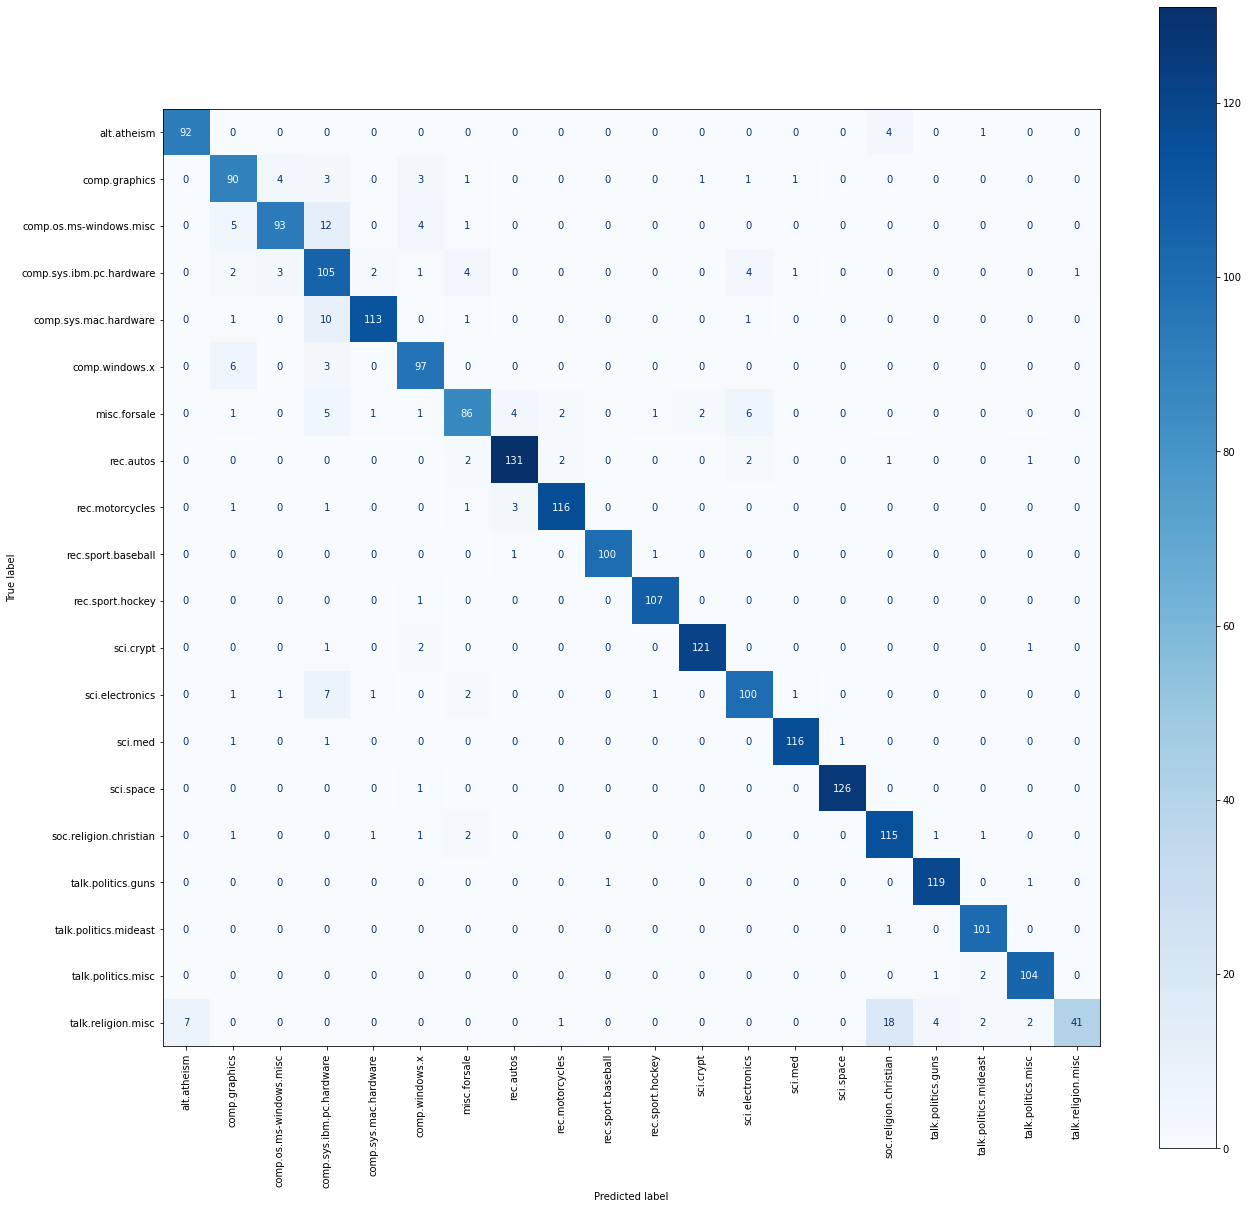

In [52]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [53]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.95      0.94        97
           comp.graphics       0.83      0.87      0.85       104
 comp.os.ms-windows.misc       0.92      0.81      0.86       115
comp.sys.ibm.pc.hardware       0.71      0.85      0.77       123
   comp.sys.mac.hardware       0.96      0.90      0.93       126
          comp.windows.x       0.87      0.92      0.89       106
            misc.forsale       0.86      0.79      0.82       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.96      0.95      0.95       122
      rec.sport.baseball       0.99      0.98      0.99       102
        rec.sport.hockey       0.97      0.99      0.98       108
               sci.crypt       0.98      0.97      0.97       125
         sci.electronics       0.88      0.88      0.88       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [57]:
my_sentence = 'I do not know what to say but I like Cars'

# 1. Apply the text pipeline to your sentence
my_sentence = text_pipeline(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
my_sentence_vectorized = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 
model.predict(my_sentence_vectorized)

# 4. Print the prediction
model.predict(my_sentence_vectorized)

array(['rec.autos'], dtype='<U24')

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [59]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [60]:
print(df.isnull().sum())

Party     0
Handle    0
Tweet     0
dtype: int64


In [64]:
df.Party.value_counts()

Republican    44392
Democrat      42068
Name: Party, dtype: int64

In [66]:
#lowercase check
def make_lower(a_string):
    return a_string.lower()

a_sentence = 'IT WILL MAKE sentences LOWER.'
make_lower(a_sentence)

'it will make sentences lower.'

In [67]:
#Remove Puncuation
def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

a_sentence = 'This is remove punctuations!!??? & other things.'
remove_punctuation(a_sentence)

'This is remove punctuations  other things'

In [70]:
# Remove all stopwords/common words
def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)

    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string
            
a_sentence = 'This will remove different stopwords such as I , and , you.'
remove_stopwords(a_sentence)


'This remove different stopwords I , , .'

In [79]:
#add stem words/ bring the origin words
def stem_words(a_string):
    # Initalize our Stemmer
    porter = PorterStemmer()#bring the root of the words
    
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    
    # Make a list to append valid words into
    valid_words = []

    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = porter.stem(word)
        
        # Append stemmed word to our valid_words
        valid_words.append(stemmed_word)
        
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)

    return a_string 


a_sentence = 'This was going or changing into original words'
stem_words(a_sentence)

'thi wa go or chang into origin word'

In [86]:
def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    input_string = remove_stopwords(input_string)  
    input_string = stem_words(input_string)
    return input_string


df['Tweet_after'] = df['Tweet']
df['Tweet_after'] = df['Tweet'].apply(text_pipeline)

print("ORIGINAL TEXT:", df['Tweet'][10])
print("CLEANDED TEXT:", df['Tweet_after'][10])

ORIGINAL TEXT: RT @AllSaints_FL: Zhihan (John)'s art received awards at this year's state competitions. We just found out he's won the Congressional Distr…
CLEANDED TEXT: rt allsaints_fl zhihan john art receiv award year state competit found he congression distr


In [87]:
# defining x and y value
X = df['Tweet_after'].values

y = df['Party'].values

In [97]:
#testing and training data
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Save the raw text for later just incase
X_train_text = X_train
X_test_text = X_test

In [98]:
#
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize our vectorizer
vectorizer = TfidfVectorizer()

# This makes your vocab matrix
vectorizer.fit(X_train)

# This transforms your documents into vectors.
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(69168, 101323) <class 'numpy.ndarray'>


In [99]:
from sklearn.metrics import f1_score 


In [103]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = model.predict_proba(X_test)

# Evaluate our model
accuracy =  model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.809854


In [104]:
# f1 = f1_score(X_test, y_test)
# print('F1 Score: %f' % f1)

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.82      0.79      0.80      8506
  Republican       0.80      0.83      0.82      8786

    accuracy                           0.81     17292
   macro avg       0.81      0.81      0.81     17292
weighted avg       0.81      0.81      0.81     17292



In [107]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.750231
              precision    recall  f1-score   support

    Democrat       0.78      0.69      0.73      8506
  Republican       0.73      0.81      0.77      8786

    accuracy                           0.75     17292
   macro avg       0.75      0.75      0.75     17292
weighted avg       0.75      0.75      0.75     17292



In [112]:
new_text = 'The Democratic Party is one of the two major contemporary political parties in the United States..'

# Feature engineer the same way we did with our original data. 
new_text = text_pipeline(new_text)

# Sanity check
print(new_text)

# Turn the new_text into numbers using the vectorizer
# NOTE, must be passed in as a list.
# NOTE, use just transform here, NOT FIT. 
new_text_vectorized = vectorizer.transform([new_text])

# make a new prediction using our model and vectorized text
model.predict(new_text_vectorized)

democrat parti one two major contemporari polit parti unit state


array(['Democrat'], dtype='<U10')